Name: Chai Yong Xin
<br>
Matrix No: 17219908
<br>

## Title: Predict the Outbreak of COVID-19 in Malaysia by using Machine Learning

## Assignment Field: Regression

## Data source (URL of dataset website): https://data.world/wnarifin/covid-19-my

## Introduction
The novel Coronavirus disease (COVID-19) was first reported on 31 December 2019 in the Wuhan, Hubei Province, China. It started spreading rapidly across the world, and the World Health Organization (WHO) has declared the coronavirus outbreak a pandemic. Malaysia’s government has implemented a lot of policies such as social distancing, wearing a face mask in the public area, and movement control order to slow down and block the chain of the coronavirus spreading. 

Important Timeline

25/01/2020
<br>
Malaysia's Health Minister, confirmed the first case of COVID-19
<br>
Ministry of Health (MOH) advises not to travel to China if there is no need.

Movement Control Order (MCO)
<br>
First phase  : 18 March 2020 to 31 March 2020
<br>
Second phase : 1 April 2020 to 14 April 2020
<br>
Third phase  : 15 April 2020 to 28 April 2020
<br>
Forth phase  : 29 April 2020 to 12 May 2020

Conditional Movement Control Order (CMCO)
<br>
First phase : 4 May 2020 to 9 June 2020

Recovery Movement Control Order (RMCO)
<br>
First phase : 10 June 2020

Enhanced Movement Control Order (EMCO)
<br>
Sabah from 20th October until 3rd November

Semi Enhanced Movement Control Order (SEMCO)

Targeted Enhanced Movement Control Order (TEMCO) 
<br>
Alor Setar Prison from 6th October to 1st November
<br>
Sabah from 29th September until 25th October 

## Objectives:
1. To investigate the effectiveness of government policies to the COVID-19.
2. To predict the growth and trend of COVID-19.

GitHub: https://github.com/YongXinChai/Predict-the-Outbreak-of-COVID-19-using-Machine-Learning

### Import Library

In [1]:
import matplotlib # we'll only use this to determine the matplotlib version number
import matplotlib.pyplot as plt  # the graphing library
import numpy as np # scientific computing library
import pandas as pd # the data structure and analysis library
from pandas import DataFrame, read_csv, Series # specific functions from pandas
import seaborn as sns # Makes graphs look pretty
import sys # we'll only use this to determine the python version number
from sklearn.model_selection import train_test_split # Split the dataset to training dataset and testing dataset
from sklearn import metrics # use for calculate the MAE, MSE, and RMSE
import seaborn as seabornInstance # the graphing library
from sklearn.svm import SVR
import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Enable inline plotting.  The % is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

### Import Covid-19 Data

In [2]:
# Import full dataset
df = pd.read_csv("Datasets\covid-19_my_full.csv")
df

,date,location,new_cases,new_deaths,total_cases,total_deaths,recover,total_recover,icu,support,...,tabligh,days_tabligh,mco,days_mco,renggam,days_renggam,cmco,days_cmco,rmco,days_rmco
0,2019-12-31,Malaysia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-01,Malaysia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-02,Malaysia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-03,Malaysia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-04,Malaysia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2020-12-23,Malaysia,1348,5,98737,444,710,80014,102,44,...,1,300,1,281,1,284,1,234,1,197
359,2020-12-24,Malaysia,1581,2,100318,446,1085,81099,102,45,...,1,301,1,282,1,285,1,235,1,198
360,2020-12-25,Malaysia,1247,3,101565,449,1441,82540,108,47,...,1,302,1,283,1,286,1,236,1,199
361,2020-12-26,Malaysia,2335,2,103900,451,874,83414,108,50,...,1,303,1,284,1,287,1,237,1,200


### Data Preprocessing

In [3]:
# Populate all columns
df.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'recover', 'total_recover', 'icu', 'support',
       'imported_cases', 'china', 'days_china', 'first', 'days_first', 'local',
       'days_local', 'uda', 'days_uda', 'tabligh', 'days_tabligh', 'mco',
       'days_mco', 'renggam', 'days_renggam', 'cmco', 'days_cmco', 'rmco',
       'days_rmco'],
      dtype='object')

In [4]:
# Check the null value in each column
df.isnull().sum()

date              0
location          0
new_cases         0
new_deaths        0
total_cases       0
total_deaths      0
recover           0
total_recover     0
icu               0
support           0
imported_cases    0
china             0
days_china        0
first             0
days_first        0
local             0
days_local        0
uda               0
days_uda          0
tabligh           0
days_tabligh      0
mco               0
days_mco          0
renggam           0
days_renggam      0
cmco              0
days_cmco         0
rmco              0
days_rmco         0
dtype: int64

In [5]:
# Data Type
df.dtypes

date              object
location          object
new_cases          int64
new_deaths         int64
total_cases        int64
total_deaths       int64
recover            int64
total_recover      int64
icu                int64
support            int64
imported_cases     int64
china              int64
days_china         int64
first              int64
days_first         int64
local              int64
days_local         int64
uda                int64
days_uda           int64
tabligh            int64
days_tabligh       int64
mco                int64
days_mco           int64
renggam            int64
days_renggam       int64
cmco               int64
days_cmco          int64
rmco               int64
days_rmco          int64
dtype: object

In [6]:
# Convert column:'date' to datetime format for indexing purpose during plotting
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date              datetime64[ns]
location                  object
new_cases                  int64
new_deaths                 int64
total_cases                int64
total_deaths               int64
recover                    int64
total_recover              int64
icu                        int64
support                    int64
imported_cases             int64
china                      int64
days_china                 int64
first                      int64
days_first                 int64
local                      int64
days_local                 int64
uda                        int64
days_uda                   int64
tabligh                    int64
days_tabligh               int64
mco                        int64
days_mco                   int64
renggam                    int64
days_renggam               int64
cmco                       int64
days_cmco                  int64
rmco                       int64
days_rmco                  int64
dtype: object

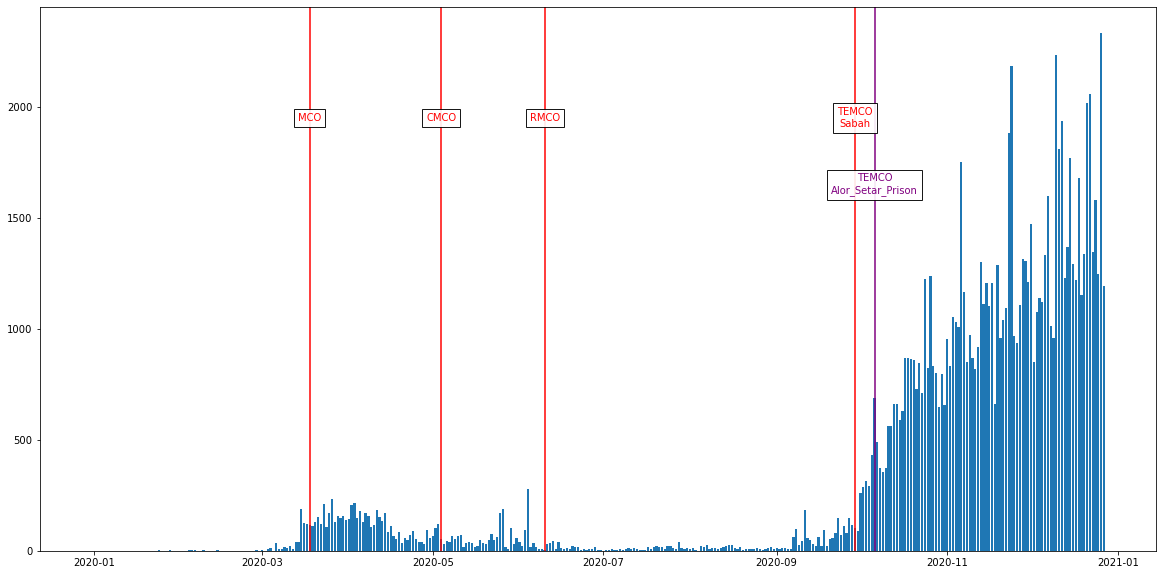

In [7]:
# Visualize the new cases for Malaysia by date
plt.figure(figsize=(20, 10))
plt.bar(df['date'],df['new_cases'])

label_list = [(pd.to_datetime("2020-03-18"), 'MCO', 'r'),
              (pd.to_datetime("2020-05-04"), 'CMCO', 'r'),
              (pd.to_datetime("2020-06-10"), 'RMCO', 'r'),
              (pd.to_datetime("2020-09-29"), 'TEMCO\nSabah', 'r')]

label_list2 = [(pd.to_datetime("2020-10-06"), 'TEMCO\nAlor_Setar_Prison', 'purple')]

ax = plt.gca()

for date_point, label, clr in label_list :
    plt.axvline(x=date_point, color=clr)
    plt.text(date_point, ax.get_ylim()[1]-500, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))
    
for date_point, label, clr in label_list2 :
    plt.axvline(x=date_point, color=clr)
    plt.text(date_point, ax.get_ylim()[1]-800, label,
             horizontalalignment='center',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))

In [8]:
# Select the mco and new_cases column to test the correlation amongst them
df = df[['mco','new_cases']]
df

,mco,new_cases
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
358,1,1348
359,1,1581
360,1,1247
361,1,2335


### Prediction

In [9]:
X = df.drop('new_cases', axis=1).values.reshape(-1,1)
X.shape

(363, 1)

In [10]:
y = df['new_cases'].values
y.shape

(363,)

In [11]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [12]:
# Find the most suitable setting

PARAMETERS_SVM = [
    {
        'kernel': ['linear','poly', 'sigmoid', 'rbf'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'gamma': [0.01, 0.1, 1],
        'epsilon': [0.001, 0.005, 0.01, 0.1, 1],
        'shrinking':[True,False]
    }
]
"""SVM parameter options to be tried during grid search"""

CROSS_FOLDS = 5
"""number of folds to use during cross validation"""

from sklearn.model_selection import GridSearchCV
search_svm = GridSearchCV(
    SVR(),
    PARAMETERS_SVM,
    cv=CROSS_FOLDS,
    refit=True
)

search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0],
                          'epsilon': [0.001, 0.005, 0.01, 0.1, 1],
                          'gamma': [0.01, 0.1, 1],
                          'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
                          'shrinking': [True, False]}])

In [13]:
model_svm = search_svm.best_estimator_
print( 'Top SVM model params: {}'.format( search_svm.best_params_ ) )
print( 'Top SVM model scores: {}'.format( search_svm.best_score_ ) )

Top SVM model params: {'C': 10.0, 'epsilon': 0.001, 'gamma': 1, 'kernel': 'rbf', 'shrinking': True}
Top SVM model scores: -0.22060111643452113


In [14]:
y_rbf_pred = model_svm.predict(X_test)
y_rbf_pred

array([7.09990005e+01, 7.09990005e+01, 9.99486163e-04, 7.09990005e+01,
       9.99486163e-04, 9.99486163e-04, 7.09990005e+01, 7.09990005e+01,
       7.09990005e+01, 7.09990005e+01, 7.09990005e+01, 7.09990005e+01,
       7.09990005e+01, 9.99486163e-04, 9.99486163e-04, 7.09990005e+01,
       9.99486163e-04, 7.09990005e+01, 7.09990005e+01, 9.99486163e-04,
       7.09990005e+01, 7.09990005e+01, 7.09990005e+01, 7.09990005e+01,
       7.09990005e+01, 7.09990005e+01, 9.99486163e-04, 9.99486163e-04,
       7.09990005e+01, 7.09990005e+01, 7.09990005e+01, 7.09990005e+01,
       7.09990005e+01, 9.99486163e-04, 9.99486163e-04, 7.09990005e+01,
       7.09990005e+01, 7.09990005e+01, 9.99486163e-04, 7.09990005e+01,
       9.99486163e-04, 7.09990005e+01, 7.09990005e+01, 7.09990005e+01,
       7.09990005e+01, 7.09990005e+01, 7.09990005e+01, 7.09990005e+01,
       9.99486163e-04, 7.09990005e+01, 7.09990005e+01, 7.09990005e+01,
       7.09990005e+01, 7.09990005e+01, 7.09990005e+01, 7.09990005e+01,
      

In [15]:
# Compare the actual output values for X_test with the predicted values
df_actual_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_rbf_pred.flatten()})
df_actual_predicted

,Actual,Predicted
0,8,70.999001
1,57,70.999001
2,0,0.000999
3,1041,70.999001
4,0,0.000999
...,...,...
68,277,70.999001
69,190,0.000999
70,9,0.000999
71,170,70.999001


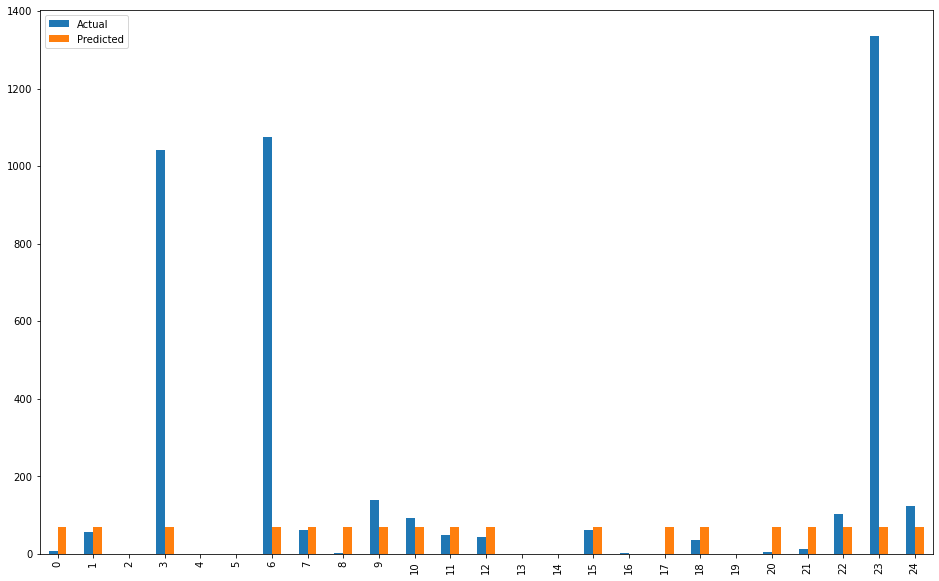

In [16]:
df_actual_predicted_25 = df_actual_predicted.head(25)
df_actual_predicted_25.plot(kind = 'bar',figsize = (16,10))
plt.show()

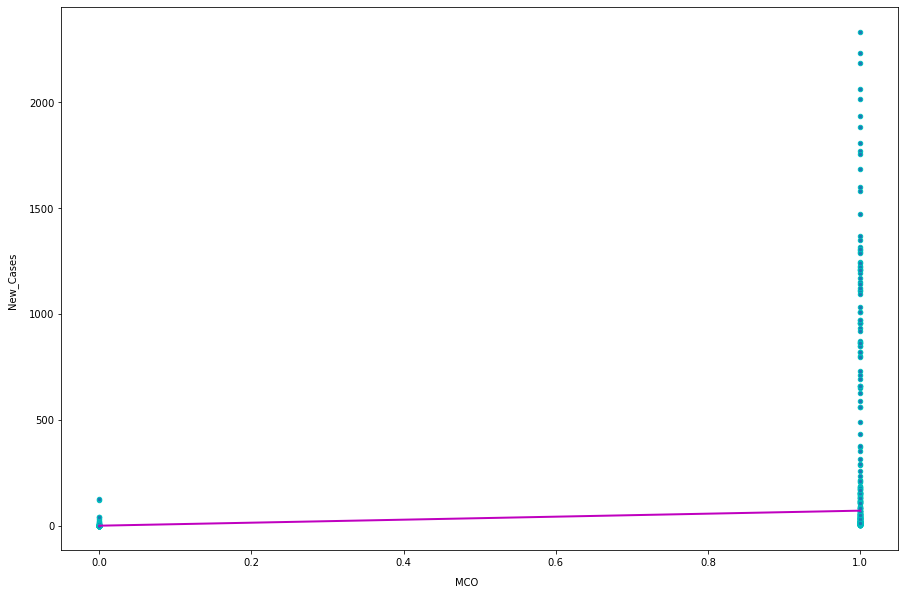

In [17]:
df_rbf_pred = pd.concat([pd.DataFrame(X_test, columns = ['X']), pd.DataFrame(y_rbf_pred, columns=['y'])], axis=1)
df_rbf_pred = df_rbf_pred.sort_values(by = 'X')

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df_rbf_pred['X'], df_rbf_pred['y'], color='m', lw = 2)
ax.scatter(X_train[model_svm.support_], y_train[model_svm.support_], edgecolor='c', s=20)
fig.text(0.5, 0.08, 'MCO', ha='center', va='center')
fig.text(0.08, 0.5, 'New_Cases', ha='center', va='center', rotation='vertical')
plt.show()

In [18]:
# To check the value of the intercept calculated by the radial basis function (RBF) regression algorithm for our dataset
print("Intercept = " + str(model_svm.intercept_))

Intercept = [35.5]


In [19]:
# Calculate MAE to judge the quality of model 
print('MAE:',mean_absolute_error(y_test, y_rbf_pred))
print('MSE:',mean_squared_error(y_test, y_rbf_pred))

MAE: 189.63012329471013
MSE: 157298.37796557322


### Conclusion

Movement Control Order is one of the policies announced by the government to slow down and block the chain of the coronavirus spreading. MCO is 0 means that there is no implement the MCO whereas MCO is 1 means that MCO is undergoing. Based on the graph above, the number of new cases keeps increasing even though the MCO is undergoing. Therefore, the effectiveness of government policy is not enough strong to control the coronavirus spreading.